# Dimensional Resemblance Analysis (DRA) Dataset A

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home directory of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from dimensional_resemblance import preprocess_data
from dimensional_resemblance import pca_transform
from dimensional_resemblance import isomap_transform_on_batch
from dimensional_resemblance import isomap_transform
from dimensional_resemblance import dra_distance

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/A_Diabetes_Data_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/A_Diabetes_Data_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/A_Diabetes_Data_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/A_Diabetes_Data_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/A_Diabetes_Data_Synthetic_WGANGP.csv'}
categorical_columns = ['gender','age','admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum',
                      'A1Cresult','change','diabetesMed','readmitted']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':        encounter_id  patient_nbr  gender      age admission_type_id  \
 0          81844290        94788  Female  [70-80)                 1   
 1         396159158    135023315    Male  [50-60)                 1   
 2          31258956     18397782    Male  [80-90)                 1   
 3         210691074     67509558    Male  [80-90)                 1   
 4         104902980     23272362  Female  [70-80)                 1   
 ...             ...          ...     ...      ...               ...   
 81407      31296060      3344202    Male  [70-80)                 1   
 81408     159139902     93611655    Male  [60-70)                 5   
 81409     232191828     85600899    Male  [70-80)                 3   
 81410       6740700      8208234  Female  [60-70)                 6   
 81411      60115668     77943780  Female  [40-50)                 6   
 
       discharge_disposition_id admission_source_id  time_in_hospital  \
 0                            1                   7  

## 2. Preprocess variables for data reduction

In [5]:
data_scaled = dict()
for name in DATA_TYPES :
    data_scaled[name] = preprocess_data(data[name])
data_scaled

{'Real': array([[-0.81271734, -1.40061561, -0.13411891, ...,  0.        ,
          0.        ,  1.        ],
        [ 2.24238123,  2.08433232, -1.13621957, ...,  0.        ,
          1.        ,  0.        ],
        [-1.30440004, -0.92788399, -0.13411891, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [ 0.64864066,  0.80784505, -0.46815246, ...,  0.        ,
          0.        ,  1.        ],
        [-1.54271421, -1.19106069,  2.53814951, ...,  0.        ,
          1.        ,  0.        ],
        [-1.02391665,  0.61007619, -1.13621957, ...,  0.        ,
          0.        ,  1.        ]]),
 'GM': array([[-1.06331768,  0.4899745 ,  0.03039435, ...,  0.        ,
          1.        ,  0.        ],
        [-0.9212993 , -0.4526156 ,  0.35992755, ...,  1.        ,
          0.        ,  0.        ],
        [ 2.52235607,  2.10212295, -0.29913885, ...,  1.        ,
          0.        ,  0.        ],
        ...,
        [-0.81494756, -0.59209575, -1.28

## 3. Principal Component Analysis (PCA)

In [6]:
pca = dict()
pca['Real'] = pca_transform(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
for name in SYNTHESIZERS :
    pca[name] = pca_transform(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
pca

{'Real':             PC1       PC2  Label
 0     -0.939818 -0.742291    0.0
 1     -1.067780  2.952225    0.0
 2     -1.452087 -0.875982    0.0
 3     -0.371030  0.858385    0.0
 4      1.249582 -1.758552    0.0
 ...         ...       ...    ...
 81407 -1.460394 -0.600659    0.0
 81408  1.444591 -0.177316    0.0
 81409  1.686061  0.131821    0.0
 81410  1.964102 -2.726955    0.0
 81411 -0.910153 -0.552469    0.0
 
 [81412 rows x 3 columns],
 'GM':             PC1       PC2  Label
 0     -0.525720 -0.367770    1.0
 1      0.710450 -0.937624    1.0
 2      0.811944  2.514242    1.0
 3     -0.389688 -1.146757    1.0
 4     -1.506432  0.419607    1.0
 ...         ...       ...    ...
 81407  1.220475 -1.901195    1.0
 81408  0.210767  1.046155    1.0
 81409 -2.283318  0.046485    1.0
 81410  0.306210 -2.306696    1.0
 81411 -0.313315 -0.319931    1.0
 
 [81412 rows x 3 columns],
 'SDV':             PC1       PC2  Label
 0     -0.621479 -1.610293    1.0
 1      0.718460 -1.143616    1.0
 2 

GM
- Joint distance:  0.0319
#############################################
SDV
- Joint distance:  0.0102
#############################################
CTGAN
- Joint distance:  0.0353
#############################################
WGANGP
- Joint distance:  0.5617
#############################################


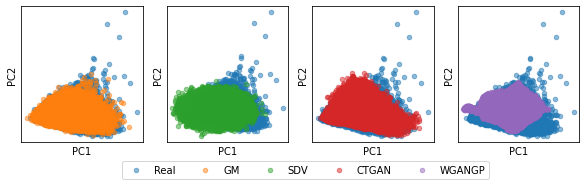

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,2.5))
axs_idxs = range(4)
idx = dict(zip(SYNTHESIZERS,axs_idxs))
targets = [0,1]
COLORS = [['tab:blue','tab:orange'], ['tab:blue','tab:green'], ['tab:blue','tab:red'], ['tab:blue','tab:purple']]
cont = 0
first = True 
legend_data = list()
pca_real = pca['Real'][['PC1','PC2']]
for name in SYNTHESIZERS :
    
    pca_data = pd.DataFrame(data=pca['Real'], columns=['PC1','PC2','Label']).append(pca[name]).sample(frac=1)
    ax = axs[idx[name]]
    colors = COLORS[cont]
    
    for target, color in zip(targets,colors):
        indicesToKeep = pca_data['Label'] == target
        handles = ax.scatter(pca_data.loc[indicesToKeep, 'PC1'], pca_data.loc[indicesToKeep, 'PC2'], c = color, s = 20, alpha = 0.5)
        
        if target == 1 or first == True :
            legend_data.append(handles)
            first = False
            
        pca_synthetic = pca[name][['PC1','PC2']]
    
    print(name)
    joint_dist = dra_distance(pca_real, pca_synthetic)
    print('- Joint distance: ', joint_dist)
    print('#############################################')
             
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_xticks([])
    ax.set_yticks([])
    cont=cont+1

ax.legend(handles=legend_data, ncol=5, labels=DATA_TYPES, bbox_to_anchor=(0.3,-0.1))
fig.savefig('DATA REDUCTION RESULTS/PCA_PLOTS.png', bbox_inches='tight')

## 4. ISOMAP

In [8]:
isomap = dict()
#isomap['Real'] = isomap_transform(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
isomap['Real'] = isomap_transform_on_batch(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
for name in SYNTHESIZERS :
    #isomap[name] = isomap_transform(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
    isomap[name] = isomap_transform_on_batch(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
isomap

{'Real':             PC1       PC2  Label
 0      0.741202  5.296716    0.0
 1      2.875327  4.211794    0.0
 2      0.976544  4.661588    0.0
 3      4.091300 -0.982809    0.0
 4      0.853006  0.887525    0.0
 ...         ...       ...    ...
 81407 -2.407288  0.782748    0.0
 81408  2.038923 -1.645137    0.0
 81409  6.095820 -2.921991    0.0
 81410  1.856130 -0.954511    0.0
 81411  7.051842  0.908193    0.0
 
 [81412 rows x 3 columns],
 'GM':             PC1       PC2  Label
 0      1.928194 -0.908405    1.0
 1      1.845206 -3.175577    1.0
 2      0.308250  1.215542    1.0
 3      0.672195 -0.314931    1.0
 4      4.536585  1.648275    1.0
 ...         ...       ...    ...
 81407  2.472637  3.168676    1.0
 81408  1.716724 -2.525179    1.0
 81409 -6.929238 -2.094592    1.0
 81410 -0.768578  2.873640    1.0
 81411  0.581418  0.652563    1.0
 
 [81412 rows x 3 columns],
 'SDV':             PC1       PC2  Label
 0     -3.408277 -3.818817    1.0
 1      2.081406 -2.725430    1.0
 2 

GM
- Joint distance:  0.5083
#############################################
SDV
- Joint distance:  0.7822
#############################################
CTGAN
- Joint distance:  0.3814
#############################################
WGANGP
- Joint distance:  2.7334
#############################################


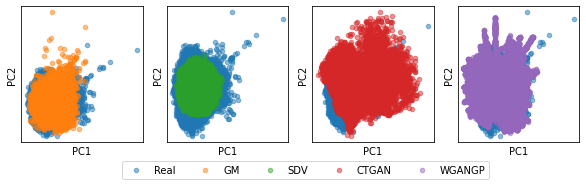

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 2.5))
axs_idxs = range(4)
idx = dict(zip(SYNTHESIZERS,axs_idxs))
targets = [0,1]
COLORS = [['tab:blue','tab:orange'], ['tab:blue','tab:green'], ['tab:blue','tab:red'], ['tab:blue','tab:purple']]
cont = 0
first = True 
legend_data = list()
isomap_real = isomap['Real'][['PC1','PC2']]
for name in SYNTHESIZERS :
    
    isomap_data = pd.DataFrame(data=isomap['Real'], columns=['PC1','PC2','Label']).append(isomap[name]).sample(frac=1)
    ax = axs[idx[name]]
    colors = COLORS[cont]
    
    for target, color in zip(targets,colors):
        indicesToKeep = isomap_data['Label'] == target
        handles = ax.scatter(isomap_data.loc[indicesToKeep, 'PC1'], isomap_data.loc[indicesToKeep, 'PC2'], c = color, s = 20, alpha = 0.5)
        
        if target == 1 or first == True :
            legend_data.append(handles)
            first = False
            
        isomap_synthetic = isomap[name][['PC1','PC2']]
        
    print(name)
    joint_dist = dra_distance(isomap_real, isomap_synthetic)
    print('- Joint distance: ', joint_dist)
    print('#############################################')
             
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_xticks([])
    ax.set_yticks([])
    cont=cont+1

ax.legend(handles=legend_data, ncol=5, labels=DATA_TYPES, bbox_to_anchor=(0.3,-0.1))
fig.savefig('DATA REDUCTION RESULTS/ISOMAP_PLOTS.png', bbox_inches='tight')